# ps3369  notebook for PUI2016 HW6

In [85]:
from __future__ import print_function, division
import geopandas as gp
import pandas as pd
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
import json

s = json.load( open(os.getenv('PUI2016')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)
if os.getenv("PUIDATA") is None:
    print ("$PUIDATA to point to set PUIdata dir")

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [39]:
nrg = pd.read_csv(os.getenv("PUIDATA") + "/" + 'Energy_and_Water_Data_Disclosure_for_Local_Law_84__2013_.csv')
bsize = gp.GeoDataFrame.from_file(os.getenv("PUIDATA")+ "/Manhattan/MNMapPLUTO.shp")

In [40]:
print(nrg.columns)

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Co-reported BBL Status', u'BBLs Co-reported',
       u'Reported NYC Building Identificaiton Numbers (BINs)',
       u'Street Number', u'Street Name', u'Borough', u'Zip Code',
       u'DOF Benchmarking Submission Status', u'Site EUI(kBtu/ft2)',
       u'Weather Normalized Site EUI(kBtu/ft2)', u'Source EUI(kBtu/ft2)',
       u'Weather Normalized Source EUI(kBtu/ft2)',
       u'Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       u'Automatic Water Benchmarking Eligible', u'Reported Water Method',
       u'ENERGY STAR Score', u'Total GHG Emissions(MtCO2e)',
       u'Direct GHG Emissions(MtCO2e)', u'Indirect GHG Emissions(MtCO2e)',
       u'Reported Property Floor Area (Building(s)) (ft²)',
       u'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       u'Primary Property Type - Self Selected', u'DOF Number of Buildings'],
      dtype='object')


In [41]:
nrg.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identificaiton Numbers (BINs),Street Number,Street Name,Borough,Zip Code,DOF Benchmarking Submission Status,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions(MtCO2e),Direct GHG Emissions(MtCO2e),Indirect GHG Emissions(MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking)(ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,12086,1.000410e+09,NaN,1000410001,1001007,NaN,NaN,Manhattan,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,918919,NaN,Office,NaN
1,14354,4.021460e+09,NaN,NaN,NaN,63-10,108 STREET,Queens,11375.0,No Submission Matched to BBL,...,Yes,None,NaN,NaN,NaN,NaN,NaN,82730.0,NaN,1.0
2,12150,2.027620e+09,NaN,2027620097,2006460,NaN,NaN,Bronx,NaN,BBL not valid,...,NaN,NaN,Not Available,NaN,NaN,NaN,64200,NaN,Multifamily Housing,NaN
3,12590,1.006700e+09,NaN,NaN,NaN,201,11 AVENUE,Manhattan,10001.0,No Submission Matched to BBL,...,No,None,NaN,NaN,NaN,NaN,NaN,440360.0,NaN,1.0
4,15591,2.048300e+09,NaN,2048300034,2063117,NaN,NaN,Bronx,NaN,Not on Covered Buildings List,...,NaN,None,Not Available,NaN,NaN,NaN,50000,NaN,Multifamily Housing,NaN


In [42]:
bsize.columns

Index([    u'APPBBL',    u'APPDate',    u'Address', u'AllZoning1',
       u'AllZoning2', u'AreaSource', u'AssessLand',  u'AssessTot',
              u'BBL',   u'BldgArea',  u'BldgClass',  u'BldgDepth',
        u'BldgFront',      u'Block',   u'BoroCode',    u'Borough',
         u'BsmtCode',  u'BuiltCode',   u'BuiltFAR',     u'CB2010',
               u'CD',     u'CT2010',    u'ComArea',    u'CommFAR',
          u'CondoNo',    u'Council',  u'EDesigNum',  u'Easements',
       u'ExemptLand',  u'ExemptTot',        u'Ext',   u'FacilFAR',
       u'FactryArea',   u'FireComp', u'GarageArea', u'HealthArea',
         u'HistDist', u'IrrLotCode',    u'LandUse',   u'Landmark',
              u'Lot',    u'LotArea',   u'LotDepth',   u'LotFront',
          u'LotType',  u'LtdHeight', u'MAPPLUTO_F',   u'NumBldgs',
        u'NumFloors', u'OfficeArea',  u'OtherArea',   u'Overlay1',
         u'Overlay2',  u'OwnerName',  u'OwnerType', u'PLUTOMapID',
       u'PolicePrct',   u'ProxCode',    u'ResArea',   u'ResidF

In [43]:
bsize.head()

,APPBBL,APPDate,Address,AllZoning1,AllZoning2,AreaSource,AssessLand,AssessTot,BBL,BldgArea,...,YearAlter2,YearBuilt,ZMCode,ZipCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,geometry
0,0.000000e+00,None,1592 2 AVENUE,C1-9/TA,None,2,468000.0,1435950.0,1.015450e+09,10885,...,0,1920,None,10028,C1-9,None,None,None,9a,"POLYGON ((997277.2344000041 221816.0936000049,..."
1,1.007230e+09,11/30/2006,263 9 AVENUE,C1-5/R8,None,2,539984.0,11879993.0,1.007238e+09,89203,...,0,1914,None,10001,R8,None,None,None,8d,"POLYGON ((984164.5626000017 211846.0703999996,..."
2,0.000000e+00,None,310 EAST 109 STREET,R7A,None,2,140102.0,343271.0,1.016800e+09,12000,...,0,1910,None,10029,R7A,None,None,None,6b,"POLYGON ((1000742.195800006 227910.6640000045,..."
3,0.000000e+00,None,720 PARK AVENUE,R10/PI/LH-1A,R8B,2,5040000.0,30591900.0,1.013850e+09,203490,...,2006,1928,None,10021,R10,R8B,None,None,8c,"POLYGON ((994007.6886000037 219880.428399995, ..."
4,0.000000e+00,None,3 WEST 83 STREET,R8B,R10A,2,437850.0,1267200.0,1.011970e+09,13839,...,0,1900,None,10024,R8B,R10A,None,None,5d,"POLYGON ((992273.6850000024 224863.4904000014,..."


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea7b065410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fea81fee3d0>]], dtype=object)

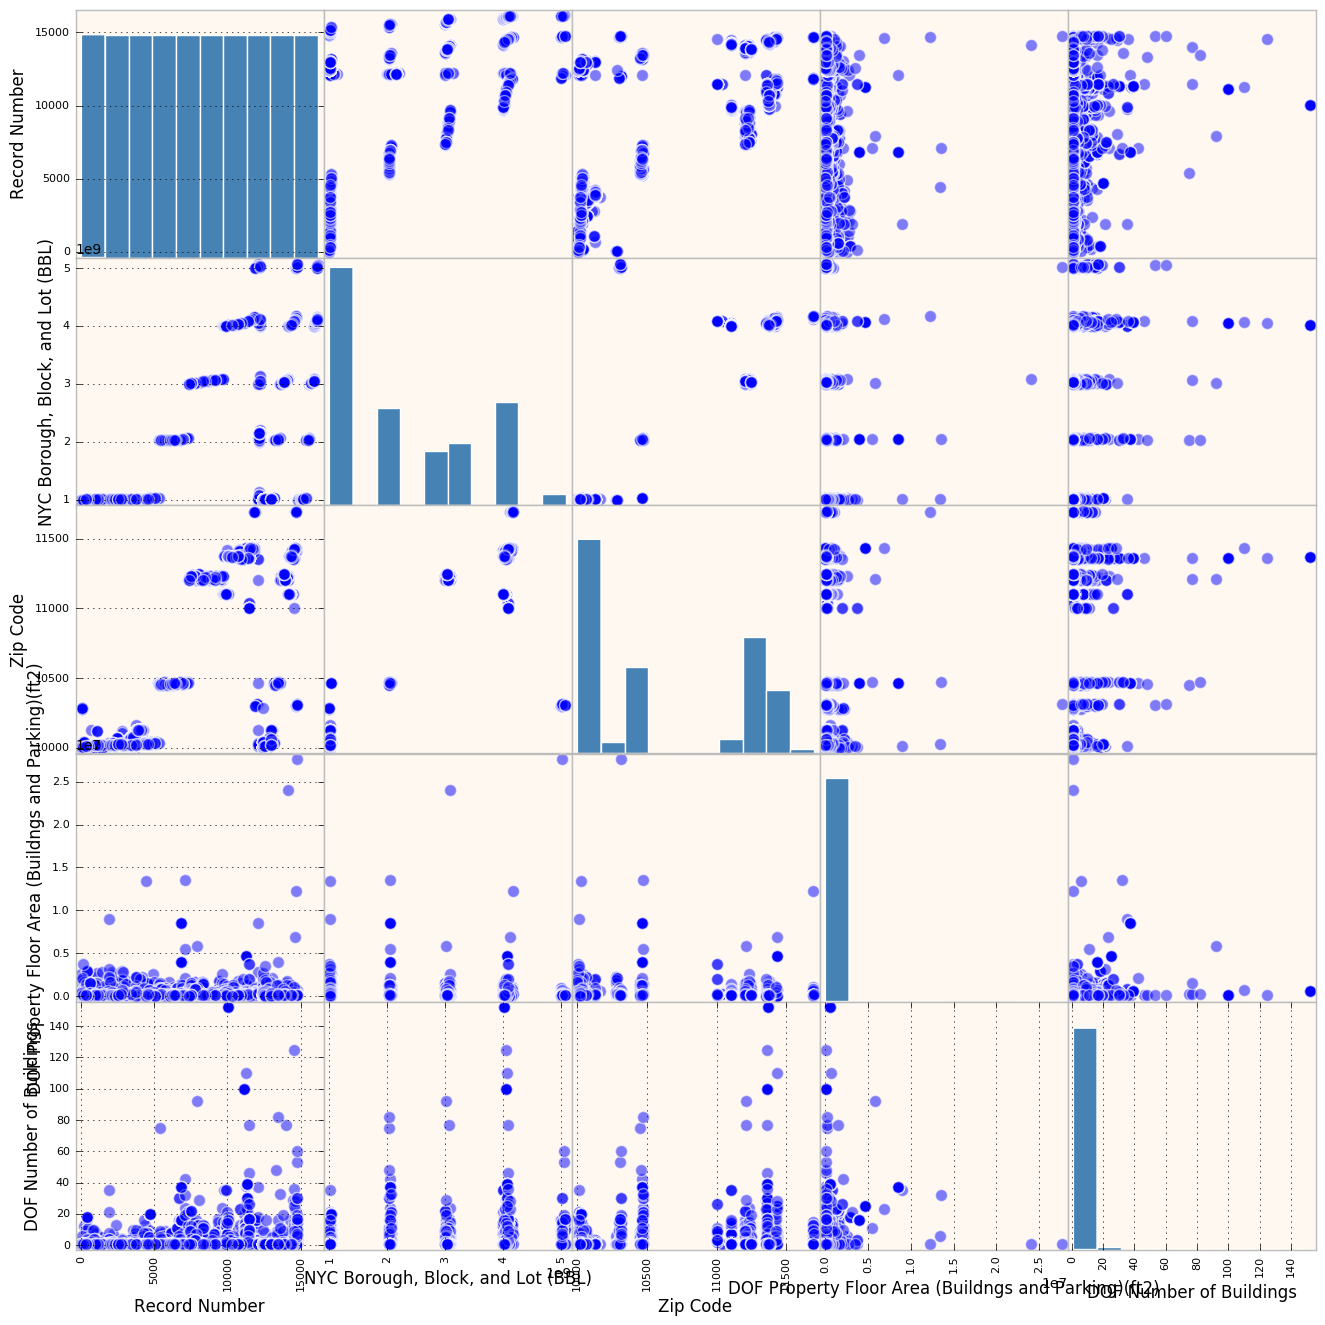

In [44]:
#try make a scatter plot of nrg. Few columns will plot
from pandas.tools.plotting import scatter_matrix
scatter_matrix (nrg, s=300, figsize=(16, 16))

Figure 1: scatter matrix of all numerical values in the files.

This kind of plot shows correlations between variables, but it will also show me what can and cannot be plotted trivially in my dataset. Here only a few columns can be plotted: those that contain only numbers (and possibly NaN's), but most columns contain rows that cannot be converted to float (e.g. entries like 'See Primary BBL' in several rows for the energy dataframe 'Site EUI(kBtu/ft2) ' column) , so Pandas refuses to plot them, cause it does not know what to do with those entries. The columns I am interested in are in fact u'Site EUI(kBtu/ft2)' which is a measure of the energy consumed PER SQ FOOT by a building, and then the building area: for eg. u'Reported Property Floor Area (Building(s)) (ft²)'. Neither gets plotted: i need to remove all values that cannot conver to float in order to use the columns and convert them to float arrays and do math with them.
Below I created a function that returns True if what is passed as argument can be converted to a float, and False otherwise. I do it with the Try/Except structure. it is a very useful python functionality that you should look into.
This has to be done entry by entry: if you give it a series you get error "cannot convert the series to..."
However you can pass it a whole array by using it in conjunction with np.vectorize (look up the syntax!) which will implement a for loop for you under the hood to pass the series entry by entry to your function.

In [8]:
# make sure you clean up your data and throw away columns you do not need!

In [45]:
#dropping columns i don't need from energy data
nrg.drop(['Co-reported BBL Status', 'BBLs Co-reported',
       'Reported NYC Building Identificaiton Numbers (BINs)',
       'Street Number', 'Street Name', 'Borough', 'Zip Code',
       'DOF Benchmarking Submission Status','Weather Normalized Site EUI(kBtu/ft2)', 'Source EUI(kBtu/ft2)',
       'Weather Normalized Source EUI(kBtu/ft2)','Municipally Supplied Potable Water - Indoor Intensity (gal/ft²)',
       'Automatic Water Benchmarking Eligible', 'Reported Water Method',
       'ENERGY STAR Score', 'Total GHG Emissions(MtCO2e)',
       'Direct GHG Emissions(MtCO2e)', 'Indirect GHG Emissions(MtCO2e)',
       'DOF Property Floor Area (Buildngs and Parking)(ft2)',
       'Primary Property Type - Self Selected', 'DOF Number of Buildings'], axis=1, inplace=True)


In [46]:
#dropping columns i don't need from Building data
bsize.drop(['APPBBL','APPDate','Address','AllZoning1','AllZoning2', 'AreaSource', 'AssessLand','AssessTot',
         'BldgArea','BldgClass','BldgDepth','BldgFront','Block','BoroCode','Borough',
        'BsmtCode',  'BuiltCode', 'BuiltFAR','CB2010','CD','CT2010','ComArea','CommFAR',
          'CondoNo','Council','EDesigNum', 'Easements',
       'ExemptLand','ExemptTot','Ext', 'FacilFAR','FactryArea','FireComp','GarageArea', 'HealthArea',
         'HistDist', 'IrrLotCode','LandUse','Landmark',
              'Lot',    'LotArea',   'LotDepth',   'LotFront',
          'LotType',  'LtdHeight', 'MAPPLUTO_F',   'NumBldgs',
        'NumFloors', 'OfficeArea',  'OtherArea',   'Overlay1',
         'Overlay2',  'OwnerName',  'OwnerType', 'PLUTOMapID',
       'PolicePrct',   'ProxCode',    'ResArea',   'ResidFAR',
       'RetailArea', 'SHAPE_Area', 'SHAPE_Leng',    'SPDist1',
          'SPDist2',    'Sanborn',  'SanitBoro',  'SanitDist',
         'SanitSub', 'SchoolDist',  'SplitZone',  'StrgeArea',
           'TaxMap',  'Tract2010',
          'Version',     'XCoord',     'YCoord', 'YearAlter1',
       'YearAlter2',  'YearBuilt',     'ZMCode',    'ZipCode',
        'ZoneDist1',  'ZoneDist2',  'ZoneDist3',  'ZoneDist4',
          'ZoneMap',   'geometry'], axis =1 , inplace = True)

In [47]:
print(nrg.columns)
print(bsize.columns)

Index([u'Record Number', u'NYC Borough, Block, and Lot (BBL)',
       u'Site EUI(kBtu/ft2)',
       u'Reported Property Floor Area (Building(s)) (ft²)'],
      dtype='object')
Index([u'BBL', u'UnitsRes', u'UnitsTotal'], dtype='object')


In [48]:
print (nrg.shape) # checking for non-real values in data
print(nrg.applymap(np.isreal).sum())

print (bsize.shape)
print(bsize.applymap(np.isreal).sum())

(16170, 4)
Record Number                                       16170
NYC Borough, Block, and Lot (BBL)                   16170
Site EUI(kBtu/ft2)                                   3966
Reported Property Floor Area (Building(s)) (ft²)     2385
dtype: int64
(42697, 3)
BBL           42697
UnitsRes      42697
UnitsTotal    42697
dtype: int64


In [49]:
nrg['Site EUI(kBtu/ft2)'] = pd.to_numeric(nrg['Site EUI(kBtu/ft2)'], errors='coerce')
nrg['Reported Property Floor Area (Building(s)) (ft²)'] = pd.to_numeric(nrg['Reported Property Floor Area (Building(s)) (ft²)'], 
                                                                        errors='coerce')  #changing non realvalues to real values by placing a NaN there.

In [50]:
print (nrg.shape)
nrg.applymap(np.isreal).sum()

(16170, 4)


Record Number                                       16170
NYC Borough, Block, and Lot (BBL)                   16170
Site EUI(kBtu/ft2)                                  16170
Reported Property Floor Area (Building(s)) (ft²)    16170
dtype: int64


Now for every column I care about I can create an array, call it for eg. indx, of True and False (a Boolean array) that i can use as an index to pick entries that I want to use from my arrays of interest. 

I can replace the entries that failed to be converted to 'NaN'
(because my function return Trues when I can convert and False otherwise i actuallly want the complementary array: ~indx) 

In [51]:
##check that your conversion worked: e.g.
print (nrg['Site EUI(kBtu/ft2)'].astype(float))
#[...] check all columns you care about in both datasets. 
#Nan's are ok, but you must not get an error when you try the conversion
#the Pluto data is much better at not using spurious entries for numerical value columns. 
#but check you can use the columns you want
print(bsize.BBL.astype(float))
#this should not return an error
#notice i can use the attribute notation to refer to columns in bsize, 
#cause the column names do not have spaces!


0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16       125.4
17         NaN
18         NaN
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         NaN
26         NaN
27         NaN
28         NaN
29         NaN
         ...  
16140      NaN
16141      NaN
16142      NaN
16143      NaN
16144      NaN
16145      NaN
16146      NaN
16147      NaN
16148      NaN
16149      NaN
16150      NaN
16151      NaN
16152      NaN
16153      NaN
16154      NaN
16155      NaN
16156      NaN
16157      NaN
16158      NaN
16159      NaN
16160      NaN
16161      NaN
16162      NaN
16163      NaN
16164      NaN
16165      NaN
16166      NaN
16167      NaN
16168      NaN
16169      NaN
Name: Site EUI(kBtu/ft2), dtype: float64
0        1.015450e+09
1        1.007238e+09


In [17]:
# #example
# # indx = (np.vectorize(canconvert)(nrg['Site EUI(kBtu/ft2)']))
# print ("invalid entries changed to NaN %d"%sum(nrg['Site EUI(kBtu/ft2)']))
# # nrg['Site EUI(kBtu/ft2)'][~indx] = float('NaN')
# #do it for however many columns you need

# MERGE THE DATASET
TO DO IT WE NEED A COMMON COLUMN: the building id BBL However the name of this variable (column) in the Energy dataset is 'NYC Borough, Block, and Lot (BBL)'. create a column 'BBL' in the nrg dataset to pass it to the 'on' keyword argument of the merge pandas method: pd.merge(..... on=['BBL']) will use the common column 'BBL' to join the information from the 2 datasets for each BBL value (check out the complete syntax!)

In [70]:
# prepare your BBL columns
nrg.rename(columns={"NYC Borough, Block, and Lot (BBL)": "BBL"}, inplace=True)
#merge
bblnrgdata = pd.merge(nrg, bsize, on=["BBL"])
bblnrgdata.head()
# Now the scatter matrix plot should show more columns.
# scatter_matrix (bblnrgdata, s=30, figsize=(16, 16))

,Record Number,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal
0,12590,1.006700e+09,NaN,NaN,0,1
1,12515,1.004370e+09,NaN,NaN,0,4
2,3028,1.013110e+09,125.4,330000.0,0,56
3,12761,1.009220e+09,NaN,NaN,148,148
4,14911,1.007400e+09,NaN,68329.0,0,1


In [71]:
print(nrg.shape)
print(bsize.shape)
print(bblnrgdata.shape)
bblnrgdata.dropna(inplace = True)
# print (nrg.shape)
# print(nrg.applymap(np.isreal).sum())

# print (bsize.shape)
# print(bsize.applymap(np.isreal).sum()) 

(16170, 4)
(42697, 3)
(6492, 6)


In [72]:
bblnrgdata.loc[:, "nrg"] = bblnrgdata['Site EUI(kBtu/ft2)'] * bblnrgdata['Reported Property Floor Area (Building(s)) (ft²)']
bblnrgdata.dropna(inplace = True)
print(bblnrgdata.shape)

bblnrgdata.head()


(5069, 7)


,Record Number,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,nrg
2,3028,1.013110e+09,125.4,330000.0,0,56,41382000.0
10,15011,1.010140e+09,154.9,841709.0,0,2,130380724.1
15,977,1.007660e+09,122.3,59468.0,0,8,7272936.4
16,1256,1.008150e+09,117.0,364000.0,0,24,42588000.0
18,500,1.005050e+09,82.1,235370.0,0,24,19323877.0


In [73]:
print (bblnrgdata.shape)
bblnrgdata.applymap(np.isreal).sum()
bblnrgdata.head()

(5069, 7)


,Record Number,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,nrg
2,3028,1.013110e+09,125.4,330000.0,0,56,41382000.0
10,15011,1.010140e+09,154.9,841709.0,0,2,130380724.1
15,977,1.007660e+09,122.3,59468.0,0,8,7272936.4
16,1256,1.008150e+09,117.0,364000.0,0,24,42588000.0
18,500,1.005050e+09,82.1,235370.0,0,24,19323877.0


In [74]:
bblnrgdata['UnitsTotal'].astype(float)
bblnrgdata.dtypes

Record Number                                         int64
BBL                                                 float64
Site EUI(kBtu/ft2)                                  float64
Reported Property Floor Area (Building(s)) (ft²)    float64
UnitsRes                                              int64
UnitsTotal                                            int64
nrg                                                 float64
dtype: object

once you have the dataframe with all the info you want, you want to plot Energy vs Number of Units in the Building. Remember: **Energy TOTAL, not per sq ft...** Here you can choose what you think makes more sense for the number of units: all units, residential units... 

**Make a  scatter plot first of Energy vs Units. It will look really bad be cause all the datapoints are at very low Unit numbers while the Unit number range actually goes up to 8000. **


Make a second plot that zooms into the region where most points are by cutting your x and y axis plotted: e,g, use xlim=(1000,1e10), ylim=(1,1000), where the numbers to be plugged in depend on exactly what you chose to plot

I left my plots below as guidance. **Remember, each plot needs a descriptive caption, and axis labels**

In [76]:
#Removing 0's from both energy data and units data
bblnrgdata_cut= bblnrgdata[(bblnrgdata['nrg']> 0) & (bblnrgdata['UnitsTotal'] > 0)]
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut['UnitsTotal'] <= 1000]
# bblnrgdata1 = bblnrgdata1[(bblnrgdata1.nrg < 1000)]
# bblnrgdata_cut
bblnrgdata_cut.head()
bblnrgdata_cut.shape

(4968, 7)

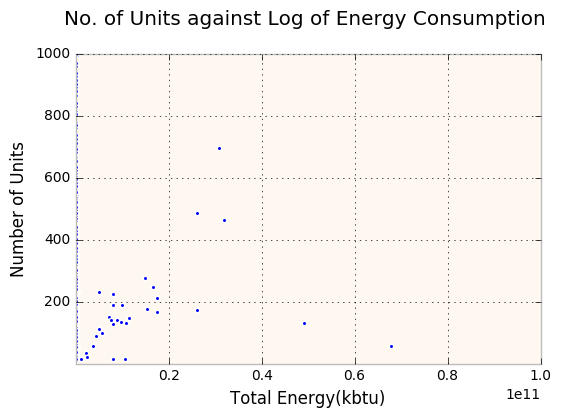

In [226]:
ax = bblnrgdata_cut.plot.scatter(y="UnitsTotal", x="nrg", s=10)
ax.set_ylim(1,1000)
ax.set_xlim(1000,1e11)
pl.ylabel("Number of Units")
pl.xlabel("Total Energy(kbtu)")
pl.title('No. of Units against Log of Energy Consumption \n')
pl.show()

In [79]:
print(bblnrgdata_cut.UnitsTotal.mean())
print(bblnrgdata_cut.UnitsTotal.min())
std = bblnrgdata_cut.UnitsRes.std()

100.792069243
1


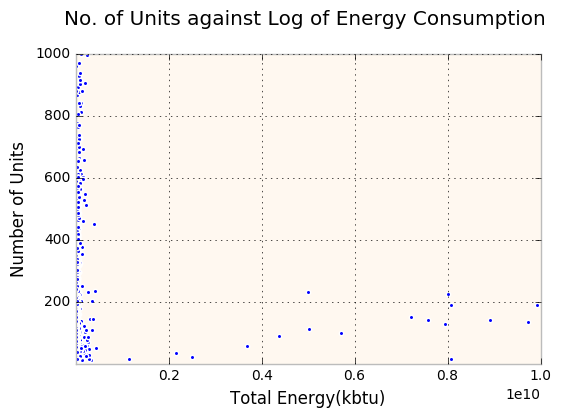

In [225]:
#Zooming data to 1e10
ax = bblnrgdata_cut.plot.scatter(y="UnitsTotal", x="nrg", s=10)
ax.set_ylim(1,1000)
ax.set_xlim(1000,1e10)
pl.ylabel("Number of Units")
pl.xlabel("Total Energy(kbtu)")
pl.title('No. of Units against Log of Energy Consumption \n')
pl.show()

when the points in a plot all look scrunched against the axis 

**Try to make a log plot instead**. In pandas you enable that with the keyword 'loglog' : bblnrgdata.plot(..... loglog=True)

NOTICE THAT YOU WILL STILL HAVE TO CUT YOUR DATASET! in my data I had a lot of energy datapoints that were exactly 0. I removed these "outliers" which I think are truly outliers in the sense that they are misreported numbers. you can remove the data that have nrg==0 (or nrg < some sensible threshold choice) by indexing your array: something like bblnrgdata_cut = bblnrgdata[bblnrgdata.nrg>1000]

Also I removed the buildings with several thousand units. points like that at the edge of my range would have a lot of "LEVERAGE", however they are not suprious entries like the 0, which i believe are missing values, or perhaps abandoned lots. these are good datapoint that i need to throw away functionally for my analysis to work, but that should be stated clearly.



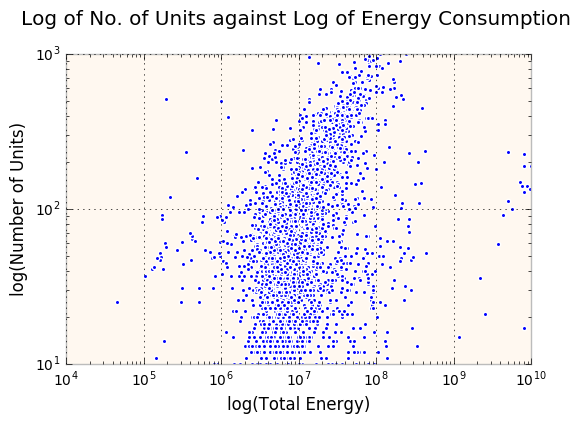

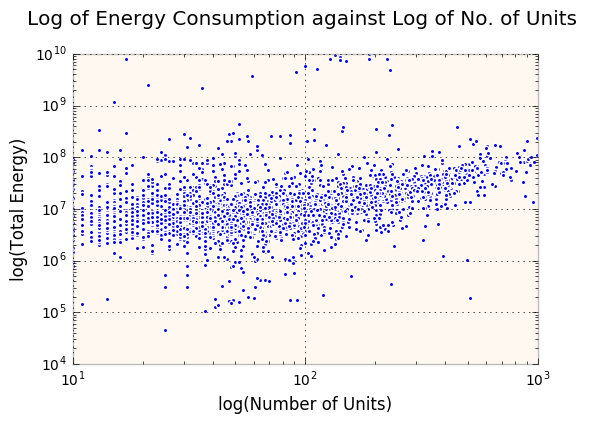

In [81]:
#log plot

ax1 = bblnrgdata_cut.plot.scatter(y="UnitsTotal", x="nrg", s=10, loglog=True)
ax1.set_ylim(10,1000)
ax1.set_xlim(1e4,1e10)
pl.ylabel("log(Number of Units)")
pl.xlabel("log(Total Energy)")
pl.title('Log of No. of Units against Log of Energy Consumption \n')

pl.show()


ax2 = bblnrgdata_cut.plot.scatter(y="nrg", x="UnitsTotal", s=10, loglog=True)
ax2.set_xlim(10,1000)
ax2.set_ylim(1e4,1e10)
pl.xlabel("log(Number of Units)")
pl.ylabel("log(Total Energy(kbtu))")
pl.title('Log of Energy Consumption against Log of No. of Units \n')

pl.show()

From the graphs above, it is clear that log(Number of units) is the independent variable since it spans a large range and spreaded somewhat evenly in the range, not clustered in a spot. So, taking log(total Energy) as dependent variable and log(Number of units) as independent variable.

Now fit a line through the data. you can use whatever you want to do it: statsmodels, scipy, any other package, or write your own minimization of the residuals

## BUT REMEMBER: we see hints of a linear relation in log space! so we want to fit a line to the log of our variables, not the variables themselves:
if you used statsmodels it would look something like this:


In [90]:
bblnrgdata_cut.loc[:,"logEnergy"] = np.log10(bblnrgdata_cut.nrg)
bblnrgdata_cut.loc[:,"logUnits"] = np.log10(bblnrgdata_cut.UnitsTotal)
bblnrgdata_cut = bblnrgdata_cut[bblnrgdata_cut['logUnits'] > 1] 
# X = sm.add_constant(np.log10(bblnrgdata.nrg))
bblnrgdata_cut.head()
# linmodel = sm.OLS(np.log10(bblnrgdata.UnitsTotal), X, missing='drop').fit()

,Record Number,BBL,Site EUI(kBtu/ft2),Reported Property Floor Area (Building(s)) (ft²),UnitsRes,UnitsTotal,nrg,logEnergy,logUnits
2,3028,1.013110e+09,125.4,330000.0,0,56,41382000.0,7.616811,1.748188
16,1256,1.008150e+09,117.0,364000.0,0,24,42588000.0,7.629287,1.380211
18,500,1.005050e+09,82.1,235370.0,0,24,19323877.0,7.286094,1.380211
19,5017,1.021420e+09,137.7,64806.0,54,62,8923786.2,6.950549,1.792392
20,5116,1.021750e+09,103.2,62839.0,75,85,6484984.8,6.811909,1.929419


In [92]:
model1 = smf.ols(formula='logEnergy ~ logUnits', data = bblnrgdata_cut).fit()
model1_pred = model1.predict()
model1.summary()
# lm = smf.ols(formula='logEnergy ~ logUnits', data = bblnrgdata).fit()
#lm = smf.ols(formula='y ~ x', data = data).fit()
#lm = sm.ols(bblnrgdata.logUnits, bblnrgdata.logEnergy, missing='drop').fit()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logEnergy   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        13:56:04   Log-Likelihood:                -2532.2
No. Observations:                4237   AIC:                             5068.
Df Residuals:                    4235   BIC:                             5081.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.0812      0.033    182.547      0.000         6.016     6.147
logUnits       0.5024      0.017     29.121      0.000         0.469     0.536
==============================================================================
Omnibus:                     2273.853   Durbin-Watson:                   1.675
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            46297.723
Skew:                           2.111   Prob(JB):                         0.00
Kurtosis:                      18.634   Cond. No.                         12.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then chi Square for Model 1 is:  108.54704513


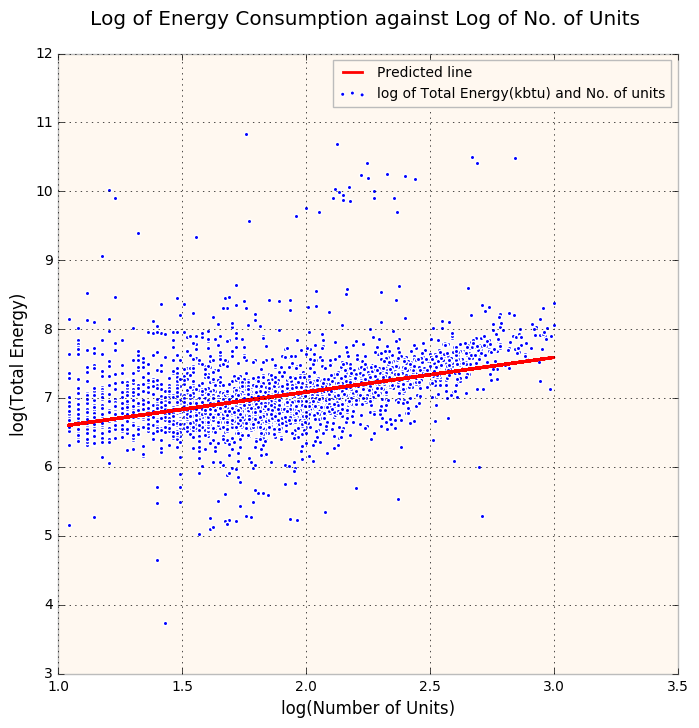

In [119]:
bblnrgdata_cut.plot.scatter(y="logEnergy", x="logUnits", s=10, figsize=(8,8), label = 'log of Total Energy(kbtu) and No. of units')
pl.xlim(1,3.5)
pl.ylim(3,12)
pl.xlabel("log(Number of Units)")
pl.ylabel("log(Total Energy)")
pl.title('Log of Energy Consumption against Log of No. of Units \n')
pl.plot(bblnrgdata_cut.logUnits, model1_pred, c = 'red', label='Predicted line')
pl.legend()

chisq1 = ((model1_pred - bblnrgdata_cut.logEnergy)**2/(np.sqrt(bblnrgdata_cut.logEnergy))**2).sum()
print("Then chi Square for Model 1 is: ", chisq1)


In [100]:
model2 = smf.ols(formula='logUnits ~ logEnergy', data = bblnrgdata_cut).fit()
model2_pred = model2.predict()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logUnits   R-squared:                       0.167
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     848.0
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          4.23e-170
Time:                        14:00:52   Log-Likelihood:                -1654.9
No. Observations:                4237   AIC:                             3314.
Df Residuals:                    4235   BIC:                             3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.4441      0.080     -5.526      0.000        -0.602    -0.287
logEnergy      0.3321      0.011     29.121      0.000         0.310     0.354
==============================================================================
Omnibus:                      130.662   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.961
Skew:                          -0.431   Prob(JB):                     9.05e-32
Kurtosis:                       3.261   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Then chi Square for Model 2 is:  332.621030972


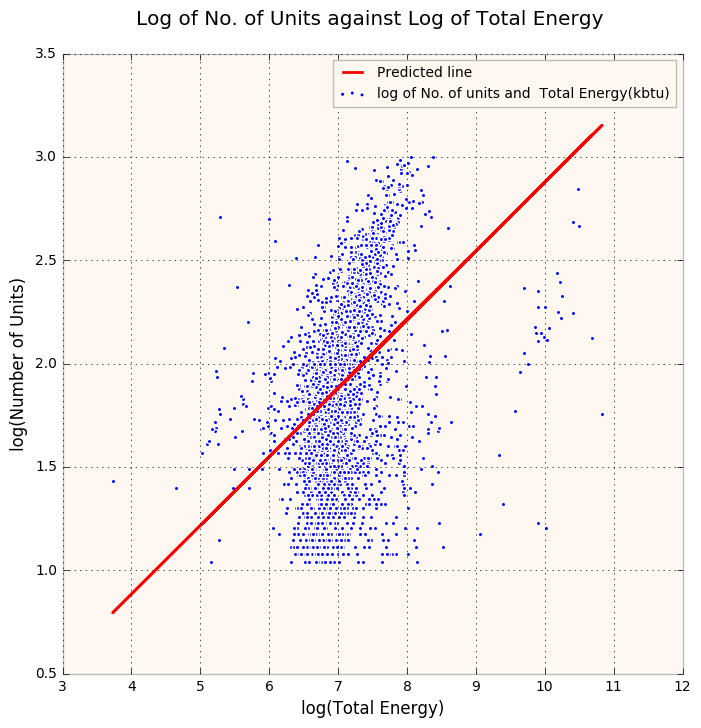

In [117]:

bblnrgdata_cut.plot.scatter(y="logUnits", x="logEnergy", s=10,figsize=(8,8), label = 'log of No. of units and  Total Energy(kbtu)')
pl.ylim(0.5,3.5)
pl.xlim(3,12)
pl.ylabel("log(Number of Units)")
pl.xlabel("log(Total Energy)")
pl.title('Log of No. of Units against Log of Total Energy \n')
pl.plot(bblnrgdata_cut.logEnergy, model2_pred, c = 'red', label='Predicted line')
pl.legend()

chisq2 = ((model2_pred - bblnrgdata_cut.logUnits)**2/(np.sqrt(bblnrgdata_cut.logUnits))**2).sum()
print("Then chi Square for Model 2 is: ", chisq2)

### Since ChiSquare value of model1 is smaller than ChiSquare value of model2, Model1 is a better fit to data.

## choose wisely which is your DEPENDENT and which is your INDEPENDENT variable. 
both for what you want to do logically (what changes as a functino of what) but also based on which variable has a 'sensible' distribution that allows you to fit a function to it: **you need your independent variable to span a large range, and to be spread somewhat evenly in the range, rather than just clustered in a spot** so in this case switching the independent and dependent variable may be a good idea.



1. **Fit a line** to Units vs Energy.
2. **Fit a line** to Energy vs Units.
3. **Evaluate which is better by calculating the chi square**. I provide a function for that or you can write your own. *Assume poisson statistics for the errors on the independent variable*. 
    The function is 
    
    chisq = $\sum_i \frac{(model(x_i) - data(x_i))^2 }{ error_i^2}$
    
    where the sum is over all datapoints, 
    
    for the i-th value with x value $x_i$ model is the predction of your fit for $x_i$, 
    
    $data(x_i)$ 
    is your observation, 
    
    and $error_i$ is $\sqrt{data(x_i)}$
    (but remember you worked in log space! What are the proper errors??)
    
4. **Fit a 2nd degree polynomial** to the Units vs Energy (with statsmodels.formulae.api.ols() for example passing the formula for a parabola, like we did in class. The formula for a 2nd deg polynomial is 
    $y = ax^2+bx+c$ .

5. **Compare the Units vs Energy line fit and the Units vs Energy 2-nd degree polynomial fit with the Likelihood ratio test**. The formula is:
    
    LR  =  -2 * (logLikelihood_Model1 - logLikelihood_Model2)
    
    where Model1 is the least complex (fewer parameters).
    
    Th logLikelihood can be extracted from the model summary when using statsmodels.
    
    Compare this LR statistics to a chi sq table (for example http://passel.unl.edu/Image/Namuth-CovertDeana956176274/chi-sqaure%20distribution%20table.PNG) and say if *at alpha = 0.05* Model1 is preferible to Model2. The LR is chi^2 distributed with number of degrees of freedom N_{DOF} = parameters_Model2 - parameters_Model1
    
    
    Also if you used statsmodels for the fit you can use the 
    compare_lr_test() method of your fit and verify you got the right answer.  Use the method compare_lr_test() of the most complex model of the 2 and pass it the result of stats models for the simpler fit 
    (e.g. smf.ols(formula = ...).fit().compare_lr_test(sm.OLS(...).fit()))



In [199]:
degree2 = bblnrgdata_cut[["logEnergy","logUnits"]]
degree2.head()

,logEnergy,logUnits
2,7.616811,1.748188
16,7.629287,1.380211
18,7.286094,1.380211
19,6.950549,1.792392
20,6.811909,1.929419


In [200]:
degree2.loc[:,'logunitSq'] = degree2.logUnits **2
degree2.head()

,logEnergy,logUnits,logunitSq
2,7.616811,1.748188,3.056161
16,7.629287,1.380211,1.904983
18,7.286094,1.380211,1.904983
19,6.950549,1.792392,3.212668
20,6.811909,1.929419,3.722657


In [201]:
model3 = smf.ols(formula='logEnergy ~ logunitSq + logUnits', data = degree2).fit()
# model3_pred = model3.predict(degree2.sortedUnits)

model3.summary()
# fits and plots here
# your plots should show datapoints (as scatter plot) and models (as lines)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logEnergy   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.226
Method:                 Least Squares   F-statistic:                     619.2
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          1.24e-236
Time:                        15:31:37   Log-Likelihood:                -2375.3
No. Observations:                4237   AIC:                             4757.
Df Residuals:                    4234   BIC:                             4776.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      8.1207      0.118     69.101      0.000         7.890     8.351
logunitSq      0.5799      0.032     18.041      0.000         0.517     0.643
logUnits      -1.7199      0.124    -13.837      0.000        -1.964    -1.476
==============================================================================
Omnibus:                     2414.967   Durbin-Watson:                   1.727
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            60434.071
Skew:                           2.228   Prob(JB):                         0.00
Kurtosis:                      20.957   Cond. No.                         121.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

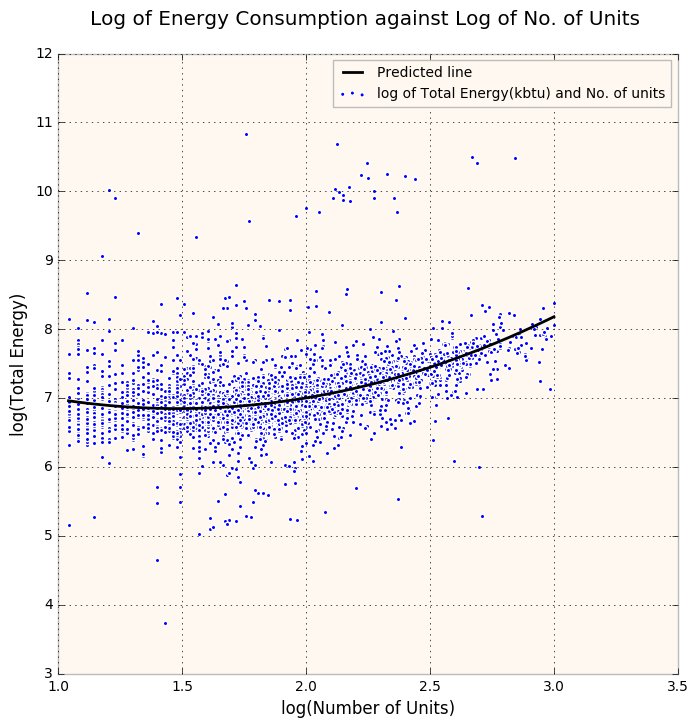

In [208]:
model3_pred = model3.predict(degree2.sort_values('logUnits'))
bblnrgdata_cut.plot.scatter(y="logEnergy", x="logUnits", s=10, figsize=(8,8), label = 'log of Total Energy(kbtu) and No. of units')
pl.xlim(1,3.5)
pl.ylim(3,12)
pl.xlabel("log(Number of Units)")
pl.ylabel("log(Total Energy)")
pl.title('Log of Energy Consumption against Log of No. of Units \n')
pl.plot((sort(degree2.logUnits)), model3_pred, c = 'black', lw = 2, label='Predicted line')
pl.legend()

# chisq3 = ((model3.predict - degree2.logEnergy)**2/(np.sqrt(degree2.logEnergy))**2).sum()
# print("Then chi Square for Model 3 is: ", chisq3)


In [211]:
degree2.loc[:,'logenergySq'] = degree2.logEnergy **2
degree2.head()

,logEnergy,logUnits,logunitSq,logenergySq
2,7.616811,1.748188,3.056161,58.015817
16,7.629287,1.380211,1.904983,58.206024
18,7.286094,1.380211,1.904983,53.087170
19,6.950549,1.792392,3.212668,48.310134
20,6.811909,1.929419,3.722657,46.402104


In [212]:
model4 = smf.ols(formula='logUnits ~ logenergySq + logEnergy', data = degree2).fit()
# model3_pred = model3.predict(degree2.sortedUnits)

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logUnits   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     485.1
Date:                Tue, 18 Oct 2016   Prob (F-statistic):          2.13e-190
Time:                        15:38:16   Log-Likelihood:                -1604.5
No. Observations:                4237   AIC:                             3215.
Df Residuals:                    4234   BIC:                             3234.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      -4.3684      0.397    -11.008      0.000        -5.146    -3.590
logenergySq    -0.0713      0.007    -10.094      0.000        -0.085    -0.057
logEnergy       1.3939      0.106     13.175      0.000         1.186     1.601
==============================================================================
Omnibus:                       92.839   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              101.570
Skew:                          -0.340   Prob(JB):                     8.80e-23
Kurtosis:                       3.336   Cond. No.                     3.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

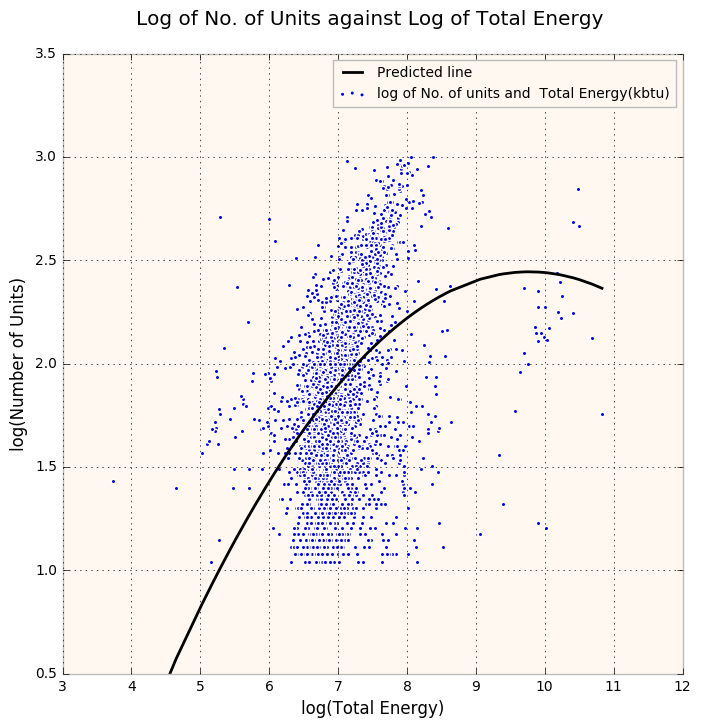

In [220]:
model4_pred = model4.predict(degree2.sort_values('logEnergy'))
bblnrgdata_cut.plot.scatter(y="logUnits", x="logEnergy", s=10,figsize=(8,8), label = 'log of No. of units and  Total Energy(kbtu)')
pl.ylim(0.5,3.5)
pl.xlim(3,12)
pl.ylabel("log(Number of Units)")
pl.xlabel("log(Total Energy)")
pl.title('Log of No. of Units against Log of Total Energy \n')
pl.plot((sort(degree2.logEnergy)), model4_pred, c = 'black', lw = 2, label='Predicted line')
pl.legend()

#### It is not a better fit we see from the above figure. Therefore polynomial fit with dependent variable as Log(total Energy) and independent variable as log(no. of units) is a better fit to data

In [219]:
#comparing the two models: model1= linmodel to data, model3= polynomial fit to data with IV= log(no.of units) and DV= log(totalEnergy)
print ("LR : ", -2 * (-model1.llf - (-model3.llf))) 
print ("LR from statsmodels:", model3.compare_lr_test(model1))

LR :  -313.805349513
LR from statsmodels: (313.8053495129725, 3.2379559949861681e-70, 1.0)


#### Since p value returned by above function is much smaller than 0.05 i.e significance level, we can reject the null hypothesis which states that the linemodel is a better fit to data than polynomial fit.
### Hence Polynomial fit to data is a better fit than the linemodel. ( DV= log(totalEnergy), IV= log(no.of units))

## Extra credit 1: calculate and plot the likelihood surface
Create a function that minimizes the residuals:

the residuals are the sum of the differences between data and model: in the case of a line fit model. Use the same function you created for the chi^2 test.

You should sum over each datapoints the residuals squared, which should look something like

(np.log(bblnrgdatacut.nrg) - np.log(bblnrgdatacut.UnitsTotal)*a+b )^2 / errors^2

where a and b are the parameters returned by the line fitter. 

For each data point you can calculate the model at different values : for example in a range B = np.arange (-100, 100, 1) for the intercept, and A = np.arange(-50.0, 50.0, 0.5) for the slope.


You can write it as a nested for loop (or challenge yourself and vectorize it!) with a loop inside another ranging all poissible combinations of the 2 variables (i use enumerate to get both an index from 0 to the size of my array, which i assign to i (and j) and the value of the array at that index - look up the syntax!):


Lsurface = np.zeros((len(A), len(B)))
for i,a in enumerate(A):
    for j,b in enumerate(B):
         Lsurface[i][j] = np.nansum(residuals(a,b,data,errors)) .....

this gives you a 2D array that represents your likelihood surface! What we do to find a good fit is find the minimum (lowest point) on this surface.
You can plot a surface (a 2D array) with pl.imshow(Lsurface) as a "heatmap" but when you do that you will find that the plot is very uninformative. just like you did before with the data, plot the log of it (pl.imshow(np.log(Lsurface)). Also make sure your x and y axes tick numbers represent the range of values, not the cell index, which is the default for imshow. Inputting your data in the cell below should give a plot similar to mine

In [234]:
errors = degree2.logEnergy/2

def residual(a,b): 
    temp = (degree2.logEnergy - (degree2.logUnits*a+b))**2 
    return (temp/ errors**2).sum()

In [235]:
intercept = np.arange (-100, 100, 1)
slope =  np.arange(-50.0, 50.0, 0.5)

In [236]:
Lsurface = np.zeros((len(slope), len(intercp)))

In [237]:
vecres = np.vectorize(residual)
Lsurface = np.array([vecres(slope, i) for i in intercept]).reshape(len(slope), len(intercept))

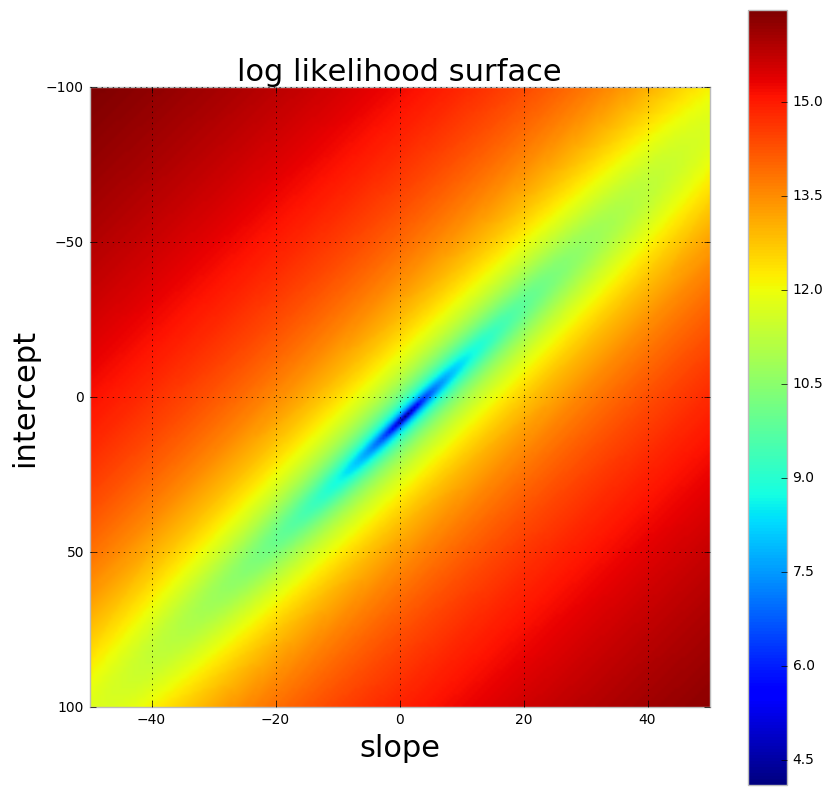

In [238]:
pl.figure(figsize=(10,10))
pl.title ("log likelihood surface", fontsize = 22)
pl.imshow(np.log(Lsurface), extent = [-50,50,100,-100], aspect=0.5)
pl.xlabel('slope', fontsize = 22)
pl.ylabel('intercept', fontsize = 22)
pl.colorbar()

## EXTRA CREDIT: get creative with the dataset. can you make an insigntful plot to show any structure in the data?

below I am mapping the building age to a colormap and the ratio of total to residential units to the size of the datapoint.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Text(0.5,0,'total energy consumption (kBtu)')

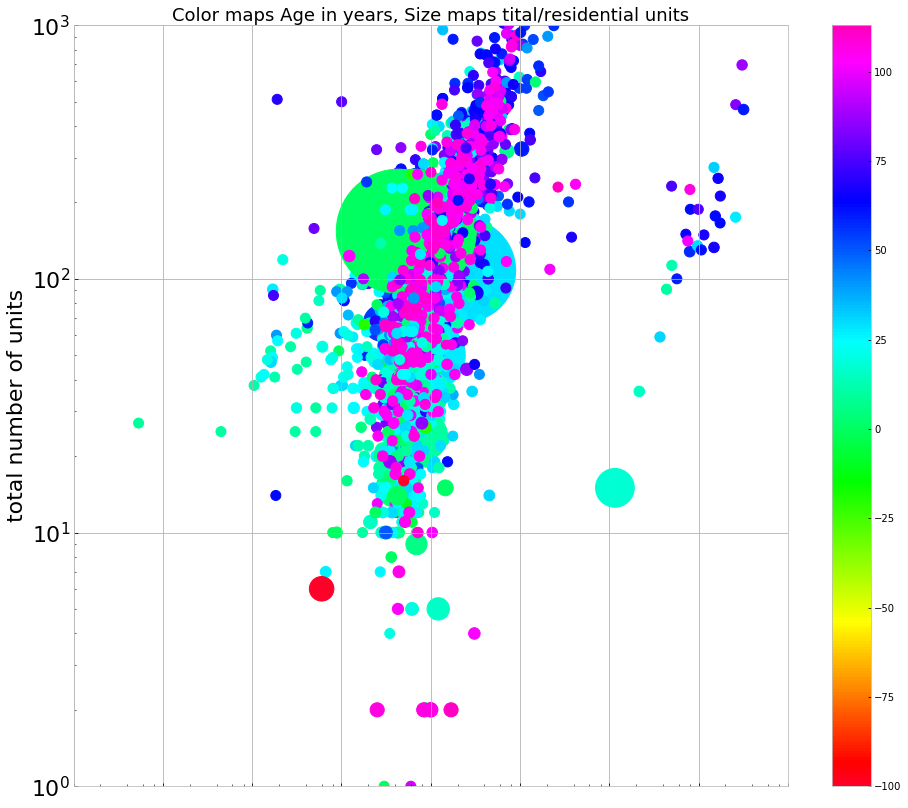

In [49]:
bblnrgdata['YearBuilt'][bblnrgdata['YearBuilt']<1800]=1800

bblnrgdata.plot(kind='scatter',x='nrg',y='UnitsTotal', 
                fontsize=22, colormap='gist_rainbow', alpha = 1, 
                marker='o',  figsize=(16, 14), loglog=True,  
                xlim=(1000,1e11), ylim=(1,1000), 
                c=bblnrgdata['YearBuilt']-1900, 
                s=bblnrgdata['UnitsTotal']/bblnrgdata['UnitsRes']*100)
pl.title('Color maps Age in years, Size maps tital/residential units', fontsize=18)
pl.ylabel("total number of units", fontsize=22)
pl.xlabel("total energy consumption (kBtu)", fontsize=22)